In [187]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [188]:


# data_augmentation = Sequential([
#     layers.RandomFlip('horizontal'),
#     layers.RandomRotation(0.2),
#     # layers.RandomZoom(0.2),
#     layers.RandomContrast(0.2),
#     # layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
#     layers.RandomBrightness(factor=0.2)
# ])

In [189]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [190]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_16 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [191]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [192]:
model = Sequential()
# model.add(data_augmentation)
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [193]:
# # generators
# train_ds = keras.utils.image_dataset_from_directory(
#     directory = r"C:\Users\singh\Downloads\tomato _dataset\tomato\train2",
#     labels='inferred',
#     label_mode = 'categorical',
#     batch_size=8,
#     image_size=(256,256)
# )

# validation_ds = keras.utils.image_dataset_from_directory(
#     directory = r"C:\Users\singh\Downloads\tomato _dataset\tomato\val2",
#     labels='inferred',
#     label_mode = 'categorical',
#     batch_size=8,
#     image_size=(256,256)
# )

In [194]:
from keras.preprocessing.image import ImageDataGenerator

In [195]:
batch_size = 4

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjust brightness (you can customize the range)
#     contrast_range=[0.8, 1.2]     # Adjust contrast (you can customize the range)
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r"C:\Users\singh\Downloads\tomato _dataset\tomato\train",
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical') 

validation_generator = test_datagen.flow_from_directory(
        r"C:\Users\singh\Downloads\tomato _dataset\tomato\val",
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 10129 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [196]:
# # Normalize
# def process(image,label):
#     image = tf.cast(image/255. ,tf.float32)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [197]:
model.compile(
    optimizer=RMSprop(lr=1e-5),                               #RMSprop because during fine tuning lower learning rate should be there
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [198]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(
        train_generator,
        epochs=25,
        validation_data=validation_generator)

Epoch 1/25
2533/2533 [==============================] - 189s 74ms/step - loss: 1.3725 - accuracy: 0.5260 - val_loss: 0.8843 - val_accuracy: 0.6960
Epoch 2/25
2533/2533 [==============================] - 167s 66ms/step - loss: 0.7218 - accuracy: 0.7531 - val_loss: 0.6305 - val_accuracy: 0.7850
Epoch 3/25
2533/2533 [==============================] - 166s 66ms/step - loss: 0.5128 - accuracy: 0.8305 - val_loss: 0.5569 - val_accuracy: 0.8240
Epoch 4/25
2533/2533 [==============================] - 166s 66ms/step - loss: 0.4186 - accuracy: 0.8579 - val_loss: 0.5447 - val_accuracy: 0.8300
Epoch 5/25
2533/2533 [==============================] - 167s 66ms/step - loss: 0.3337 - accuracy: 0.8894 - val_loss: 0.4450 - val_accuracy: 0.8760
Epoch 6/25
2533/2533 [==============================] - 166s 66ms/step - loss: 0.3004 - accuracy: 0.9011 - val_loss: 0.3476 - val_accuracy: 0.8810
Epoch 7/25
2533/2533 [==============================] - 166s 66ms/step - loss: 0.2791 - accuracy: 0.9122 - val_loss: 0

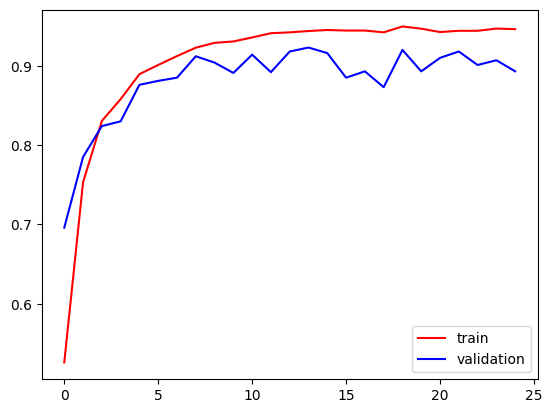

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

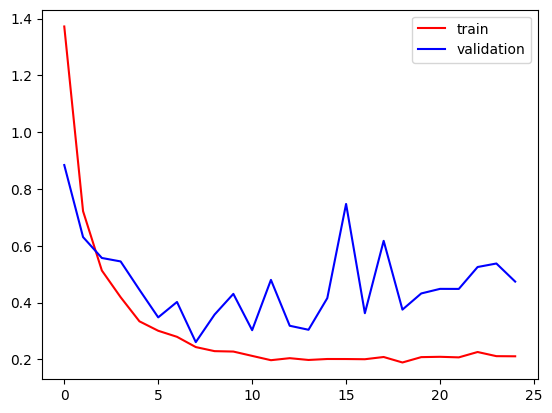

In [ ]:


plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

250/250 [==============================] - 11s 44ms/step - loss: 0.4737 - accuracy: 0.8930
Test Loss: 0.4736727178096771
Test Accuracy: 0.8930000066757202


In [203]:
# Predict classes for test set
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
class_labels = list(validation_generator.class_indices.keys())

250/250 [==============================] - 11s 43ms/step


In [ ]:
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(validation_generator.classes, y_pred, target_names=class_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(validation_generator.classes, y_pred))


Classification Report:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.15      0.15      0.15        20
                        Tomato___Early_blight       0.17      0.25      0.20        20
                         Tomato___Late_blight       0.14      0.20      0.16        20
                           Tomato___Leaf_Mold       0.11      0.10      0.10        20
                  Tomato___Septoria_leaf_spot       0.00      0.00      0.00        20
Tomato___Spider_mites Two-spotted_spider_mite       0.03      0.05      0.04        20
                         Tomato___Target_Spot       0.20      0.10      0.13        20
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.14      0.15      0.15        20
                 Tomato___Tomato_mosaic_virus       0.17      0.15      0.16        20
                             Tomato___healthy       0.00      0.00      0.00        20

                 